In [2]:
from spectral_cube import SpectralCube
import regions
from regions import Regions
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
from astropy.visualization import simple_norm
from astropy.coordinates import SkyCoord

In [ ]:
print('hello world')

: 

In [3]:
pwd

'/blue/adamginsburg/savannahgramze/ACES_EVF/aces_evf'

In [ ]:
fn_max_CS = '/orange/adamginsburg/ACES/mosaics/cubes/moments/CS21_CubeMosaic_max.fits'
max_CS = fits.open(fn_max_CS)
ww = WCS(max_CS[0].header)

fn_CS = '/orange/adamginsburg/ACES/mosaics/cubes/CS21_CubeMosaic.fits'
cube_CS = SpectralCube.read(fn_CS)

In [ ]:
reg_list = '/blue/adamginsburg/savannahgramze/ACES_EVF/aces_evf/EVF_reg_list.reg'
regions = Regions.read(reg_list)#'region_list.reg')
regions

: 

: 

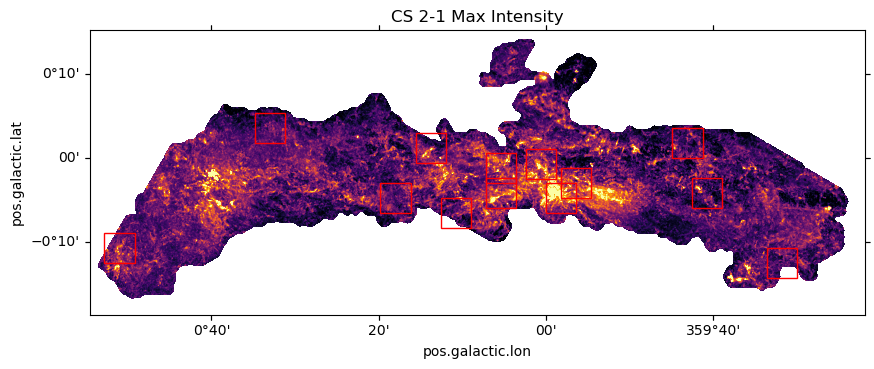

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(projection=ww)
norm = simple_norm(max_CS[0].data, stretch='linear', min_percent=1, max_percent=99)
ax.imshow(max_CS[0].data, cmap='inferno', origin='lower', norm=norm)
ax.set_title('CS 2-1 Max Intensity')
for reg in regions:
    reg_pix = reg.to_pixel(ww)
    reg_pix.plot(ax=ax, edgecolor='red')

In [41]:
for reg in regions:
    l = reg.center.galactic.l.value
    b = reg.center.galactic.b.value
    if l > 90:
        l = l - 360
    l = round(l, 2)
    print(l, b)

-0.47 -0.21
-0.32 -0.07
-0.06 -0.05
-0.03 -0.08
0.09 -0.07
0.09 -0.02
0.18 -0.11
0.23 0.02
0.3 -0.08
0.55 0.06
0.85 -0.18
0.01 -0.012
-0.28 0.03


In [ ]:
for reg in regions:
    subcube = cube_CS.subcube_from_regions([reg])
    subcube = subcube.with_spectral_unit(u.km/u.s, velocity_convention='radio')
    l = reg.center.galactic.l.value
    b = reg.center.galactic.b.value
    if l > 90:
        l = l - 360
    l = round(l, 2)

    subcube.write(f'/orange/adamginsburg/ACES/broadline_sources/EVFs/cubes/CS21_l{l}_b{b}.fits', overwrite=True)